---
title: Introduction to GIS
short_title: Intro to GIS
---

Working with GIS and geospatial data can seem difficult and complicated. But in this notebook we will try to demystify these concepts. At least from a practical perspective, this guide should provide the most important concepts that you'll need as you start working with geospatial data. Some of the concepts covered are intentionally simplified to make them easier to understand.

## Introduction

GIS stands for **Geographic Information Systems**, and can be summarized as the software and technology for working with geospatial data. 

### Desktop software

There are two main desktop softwares used today: 
- [ArcGIS Pro](https://www.esri.com/en-us/arcgis/products/arcgis-pro/overview) is a desktop GIS software by ESRI, the biggest commercial geospatial company today. It's focused on user-friendlyness, but often limited by a steep price point. 
- [QGIS](https://qgis.org/) is a free and open-source GIS, used in many parts of the world and sectors. It's focused on being freely available and feature-rich. 

### Web mapping

In the last few years there's also been a big growth in web mapping technology, allowing advanced map visualizations and data processing right in the browser. This includes a number of JavaScript mapping libraries, like [OpenLayers](https://openlayers.org/), [Leaflet](https://leafletjs.com/), [MapBox](https://www.mapbox.com/), and many more. 

### Spatial Databases

Most databases today also have spatial extensions to store and work with geospatial using SQL language. One of the more popular and free ones today is the [PostGIS geospatial extension](https://postgis.net/) to PostgreSQL, or the [SpatiaLite extension](https://www.gaia-gis.it/fossil/libspatialite/index) to SQLite. A typical geospatial SQL query can look something like this: 

```
    SELECT city.name, state.name, city.geom
    FROM city JOIN state ON ST_Intersects(city.geom, state.geom);
```

### High-Performance Tech Stacks

There are also many exotic technology stacks that have emerged in recent year focused on high performance and distributed processing when working with geospatial big data. These include technologies like [GeoSpark](https://sedona.apache.org/latest/), [SpatialHadoop](https://spatialhadoop.cs.umn.edu/), and [GeoMesa](https://www.geomesa.org/). These typically have a high barrier for getting started. 

### Programming Tools

Most programming languages also have a range of geospatial libraries for programmatically working with geospatial data. Python in particular has become very popular for working with geospatial data. This allows for greater automation than traditional GIS software. 

This is where Climate Tools fits in. 

## Vector data

When working with data in DHIS2, we're generally used to working with simple tabular data. 

However, DHIS2 also contains some geospatial data in the form of **vector data**. 

### Geometry objects

Vector data are geospatial objects with clearly defined geometry boundaries, either as points, lines, or polygons:

![Types of vector geometries](./images/geometry-types.png)

In the context of DHIS2, examples of vector data include:

- the polygons of DHIS2 organisation units
- the point locations of DHIS2 health facilities. 

![DHIS2 Polygons](./images/dhis2-polygons.png)

This is typically just the same tables you're used to, where each row in the table describe the attributes of a geospatial feature like an organisation unit, and an added column containing the geometry information:

![Table data with geometry column](./images/table-with-geoms.png)

Geometry data can be stored and represented in different ways. A common one you’ll likely deal with is as a string formatted according to the [GeoJSON standard](https://geojson.org/):

```
    {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [125.6, 10.1]
        },
        "properties": {
            "name": "Dinagat Islands"
        }
    }
```

Another common format is geometry recorded as [Well Known Text (WKT)](https://libgeos.org/specifications/wkt/) strings:

```
    POLYGON ((0 0, 4 0, 4 4, 0 4, 0 0), (1 1, 1 2, 2 2, 2 1, 1 1))
```

### File formats

Vector data typically comes in two forms:

- In the form of **Shapefiles**, which have been widely used for many years, and is actually a collection of files (`.shp`, `.dbf`, `.prj`, and more), often contained in a zipfile.
- In the form of **GeoJSON files** (`.geojson` extension), which although not very efficient are very popular and easy to work with, especially over the internet. 

There are also many other and more modern file formats, and although these are generally smaller and more efficient, you are unlikely to come across many of these in the real world. 

### Vector data in Python

So how do we work with vector data in Python? There are many tools available for the Python language, but [GeoPandas](https://geopandas.org/en/stable/) is probably the most common way of loading and manipulating vector data. This is similar to Pandas DataFrames, but with an added geometry column. 

You may also have heard of [Shapely](https://shapely.readthedocs.io/en/stable/), this is the engine that GeoPandas uses to do perform spatial queries and comparisons of the geometry parts of DataFrames. However, in most cases you don't need to work with Shapely directly, but it's good to know about. 

## Raster

If vector data represents distinct geometry objects, **raster data** represents gradually continuguous data on a regular grid of pixels. This is what we talk about as gridded climate data showing e.g. how precipitation or temperature is distributed over a surface. 

DHIS2 does not currently have a way of storing raster data, so this is why it's important that we have tools outside of DHIS2 to process climate data. 

### Gridded pixel data

Raster data is really just an image containing values for each pixel (e.g. population counts). For instance, we can use image software to open and display both a regular photo of a cat and raster data of population distribution:

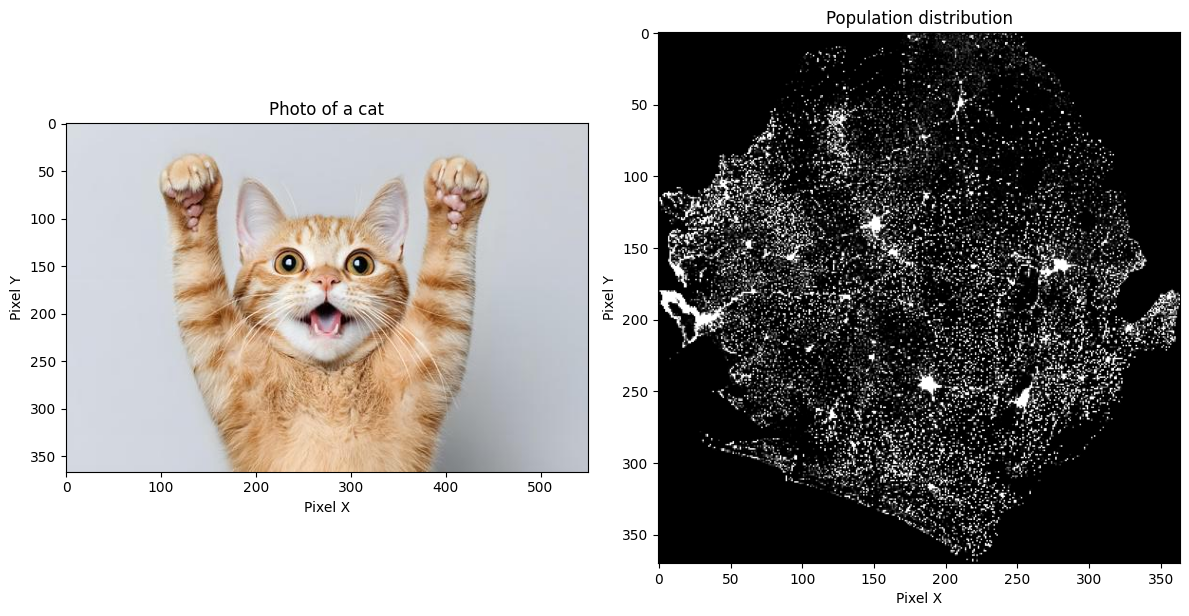

In [16]:
import matplotlib.pyplot as plt
from PIL import Image

# load both as images
from PIL import Image
photo = Image.open('./images/cat.jpg')
raster = Image.open('../data/sle_pop_2025_CN_1km_R2025A_UA_v1.tif')

# create side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Left: Photo with image coordinates
axes[0].imshow(photo)
axes[0].set_title("Photo of a cat")
axes[0].set_xlabel("Pixel X")
axes[0].set_ylabel("Pixel Y")

# Right: Raster with image coordinates
axes[1].imshow(raster)
axes[1].set_title("Population distribution" \
"")
axes[1].set_xlabel("Pixel X")
axes[1].set_ylabel("Pixel Y")

plt.tight_layout()
plt.show()

The main difference is that raster data also has additional **georeferencing information** that defines the coordinates of the grid -- this is what makes it geospatial. Among other things, this defines the coordinate of the upper left corner of the pixel grid, and the **spatial resolution** of each raster pixel. 

If we instead visualize the raster data with proper geospatial tools, we see that the raster becomes properly positioned at the correct latitude-longitudes coordinates: 

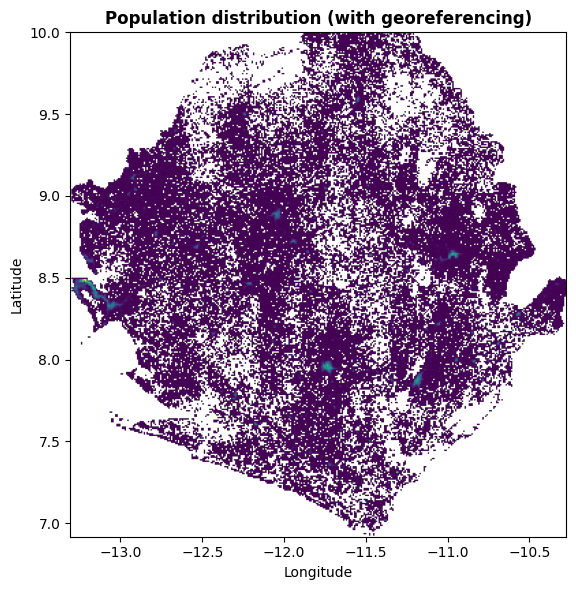

In [19]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

raster = rasterio.open('../data/sle_pop_2025_CN_1km_R2025A_UA_v1.tif')

fig, ax = plt.subplots(figsize=(8, 6))
show(raster, ax=ax, title="Population distribution (with georeferencing)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()

### File formats

Raster data commonly comes in the form of **GeoTIFF** which is an image format (`.tif` extension), with added metadata to store the georeferencing information. This typically contains only a single raster layer, e.g. like the population data shown previously. 

Another common raster file format, especially for climate data, is **NetCDF** (`.nc` extension). This is a more efficient format and can store up to multiple data variables and stacks of timeseries rasters: 

![NetCDF as stacks of rasters](./images/netcdf-variables.png)

Newer formats have also been developed for even more efficient data storage and access, such as [zarr](https://zarr.dev/) and [Cloud Optimized GeoTIFF](https://cogeo.org/). 

### Raster data in Python

How do we typically work with raster data in Python? Some of the common packages include [rasterio](https://rasterio.readthedocs.io/en/stable/) and [xarray](https://docs.xarray.dev/en/stable/user-guide/io.html). 

In Climate Tools we want to streamline our efforts by also using the new [earthkit](https://earthkit.readthedocs.io/en/latest/) package for loading and processing climate data. Earthkit uses `xarray` on the backend and simplifies some common operations, but sometimes `earthkit` is not enough and we need to switch to `xarray` or `rasterio` to do certain operations. 

## Projections

The location of vector and raster data is based on the coordinate reference system (CRS) of the data. This information is typically embedded as metadata in the file itself or in auxilliary files. 

### Latitude-longitude coordinates

Often, coordinates are given as latitude longitude coordinates, a way of dividing the earth between decimal degrees ranging from -180 to 180 longitudes (west to east) and -90 to 90 (south to north):

![Dividing earth into latitude-longitudes](./images/lat-long.png)

When data is stored in latitude longitude coordinates, a useful way to think of these coordinates is that every 0.1 decimal degree is approximately equivalent to 10km at the equator (though this distance decreases towards the poles). This means that a raster dataset with 0.01 degree resolution has pixels with the size of 1km near the equator. The [Wikipedia entry on Decimal Degrees](https://en.wikipedia.org/wiki/Decimal_degrees) has a useful overview table of decimal distances in metric units. 

You can typically tell that data is defined as latitude-longitude when you observe:

- coordinate values that fit within the range of valid decimal degrees.
- the CRS name is given as "WGS1984".
- the CRS EPSG Code is given as 4326. 

### Projected x-y coordinates

Other times your data are defined by instead using mathematical equations to project the earth's 3-dimensional sphere to a 2-dimensional flat x-y surface. Different coordinate systems are used to better visualize data for particular regions of the world or different use-cases. This is why there are many different shapes and looks for maps:

![Comparisons of world map projections](./images/projections.png)

You can typically tell it's x-y projected data by the very large values of the coordinates, e.g. millions. 

## Mapping

This leads us to mapping and visualization of geospatial data. It might seem like this is very mysterious and based on complicated maths, but this too is simpler than it looks. At least for vector data, this is just plotting the coordinates directly on a regular x-y coordinate system (for raster data it's slightly more complicated). 

To demonstrate let's use regular plotting software to plot health facility point data for Sierra Leone: 

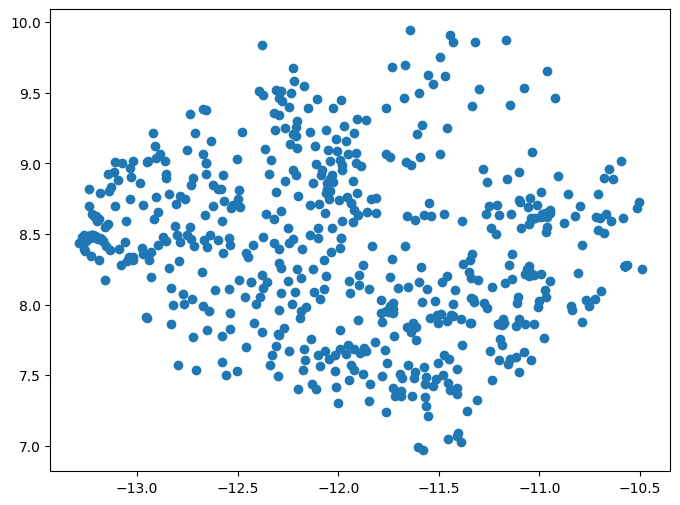

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
facil = gpd.read_file('../data/sierra-leone-facilities.geojson')
# extract x and y coordinates
x = facil.geometry.x
y = facil.geometry.y
# create figure for plotting
fig, ax = plt.subplots(figsize=(8, 6))
# plot the x and y coordinates simply as points
ax.plot(x, y, 'o')
# show figure
plt.show()

These points end up at the expected latitude longitude coordinates for Sierra Leone. Next, let's also add the organisation units for Sierra Leone, to check that both data sources show up where we expect. We also check and confirm that both the health facilities and the organisation units have the same coordinate reference system, where the value of 'EPSG:4326' confirms that they're both latitude-longitude. 

CRS: EPSG:4326 vs EPSG:4326


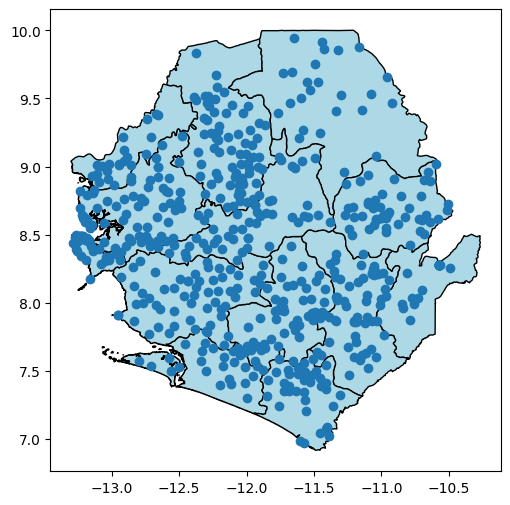

In [27]:
import matplotlib.pyplot as plt
import geopandas as gpd
org_units = gpd.read_file('../data/sierra-leone-districts.geojson')
facil = gpd.read_file('../data/sierra-leone-facilities.geojson')
# check the CRS information for both data sources
print(f'CRS: {org_units.crs} vs {facil.crs}')
# extract x and y coordinates
x = facil.geometry.x
y = facil.geometry.y
# create figure for plotting
fig, ax = plt.subplots(figsize=(8, 6))
# plot the org units
org_units.plot(ax=ax, edgecolor='black', facecolor='lightblue')
# plot the x and y coordinates simply as points
ax.plot(x, y, 'o')
# show figure
plt.show()

A map may contain data sources with many different types of coordinate systems. Mapping software therefore have to consider the projection of each data source, and reproject/convert the coordinates of each source on-the-fly so they can be shown on a single map coordinate system. 

For instance, if we reproject the point data to some other coordinate system, and try to create the same map, we see that the two data sources become entirely unaligned: 

CRS: EPSG:4326 vs EPSG:3857


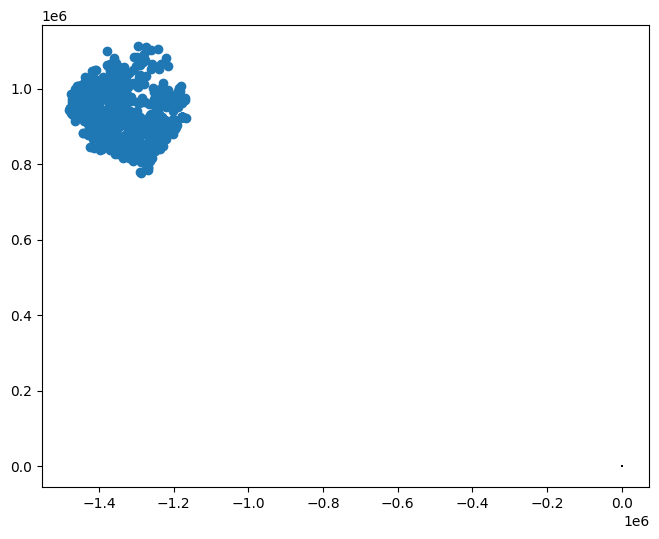

In [28]:
import matplotlib.pyplot as plt
import geopandas as gpd
org_units = gpd.read_file('../data/sierra-leone-districts.geojson')
facil = gpd.read_file('../data/sierra-leone-facilities.geojson')
# reproject the point data
facil = facil.to_crs(epsg=3857)
# check the CRS information for both data sources
print(f'CRS: {org_units.crs} vs {facil.crs}')
# extract x and y coordinates
x = facil.geometry.x
y = facil.geometry.y
# create figure for plotting
fig, ax = plt.subplots(figsize=(8, 6))
# plot the org units
org_units.plot(ax=ax, edgecolor='black', facecolor='lightblue')
# plot the x and y coordinates simply as points
ax.plot(x, y, 'o')
# show figure
plt.show()

The reprojected facility data now has coordinate values in the millions, whereas the organisation unit data which is still in latitude longitude can barely be seen in the bottom right near the 0,0 coordinate. 

## Climate Data and DHIS2

How does this impact us when trying to integrate climate data into DHIS2? Most of the time climate data is gridded raster data, and we want to map that onto DHIS2 organisation units which are vector geometries. 

So the question becomes how do we do we combine raster and vector data? This is what we refer to as harmonizing the data. In GIS this is typically called zonal statistics, and the process goes something like this:

- Make sure that the vector data and raster data are in the same coordinate system so they can be compared.
- Figure out which pixels land inside each vector geometry, such as each organisation unit.
- Then those pixels are aggregated based on some statistic like sum or mean.
- The aggregated value for each vector geometry is attached to the original table containing the organisation units.

![Zonal statistics](./images/zonal-stats.png)

## Conclusion

These are some of the fundamental concepts for working with GIS, geospatial data sources, and harmonizing raster data into DHIS2. For further details and more advanced topics, check out our [list of resources](../resources.md) which includes various training materials and books on the subject. 